#Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from google.colab import drive


#Mounting Drive and Loading Dataset

In [ ]:
drive.mount('/content/drive')
car_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/car_evaluation_modified.csv')

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
car_data.columns = col_names

car_data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


#Visualizing features of the Dataset

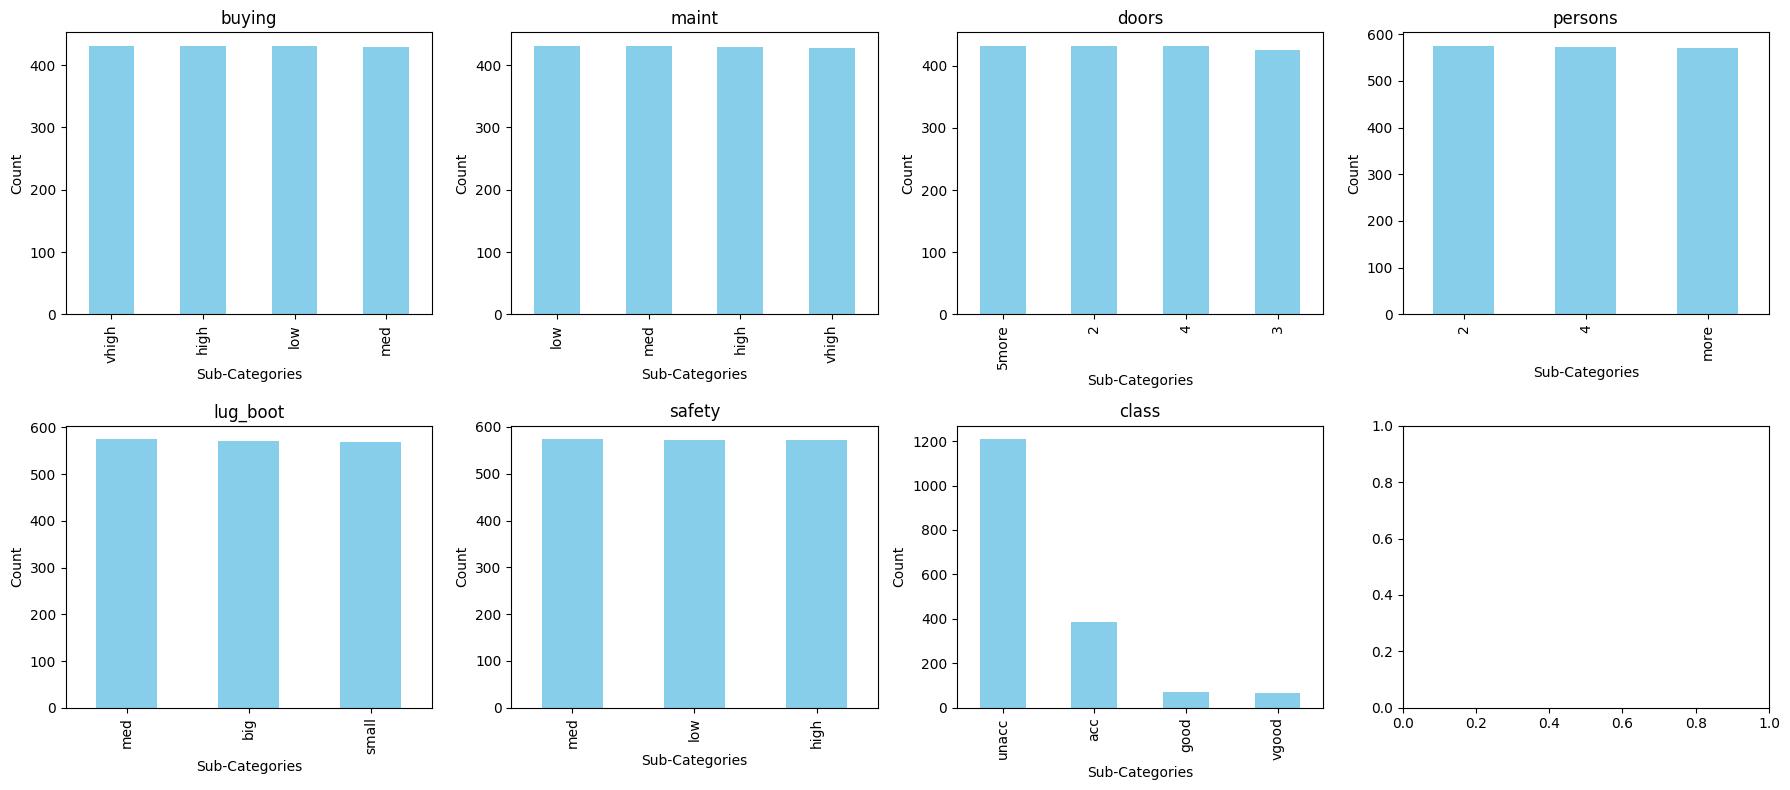

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
num_col = len(car_data.columns)

for i in range(num_col):
    car_data[car_data.columns[i]].value_counts().plot(kind='bar', color='skyblue', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{car_data.columns[i]}')
    axes[i//4, i%4].set_xlabel('Sub-Categories')
    axes[i//4, i%4].set_ylabel('Count')

plt.tight_layout()
plt.show()



#Null Values

In [ ]:
car_data.isnull().sum()

buying       5
maint        9
doors        8
persons      9
lug_boot    11
safety       8
class        0
dtype: int64

**Representing which specific Rows and Columns have null values through heat map**

<Axes: >

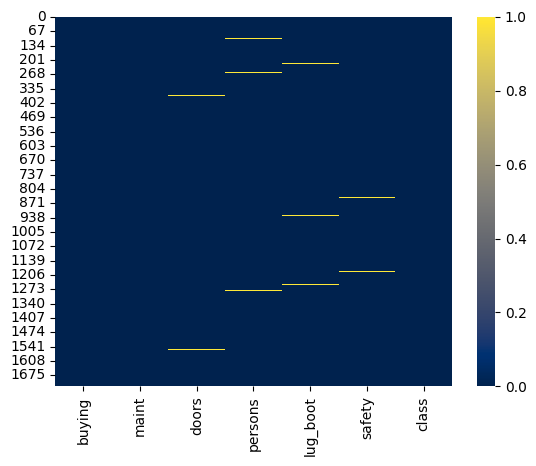

In [ ]:
sns.heatmap(car_data.isnull(), cmap = 'cividis')

**Representing which specific Rows and Columns have null values**

In [ ]:
car_data.loc[car_data.isnull().any(axis=1)]

,buying,maint,doors,persons,lug_boot,safety,class
52,vhigh,vhigh,NaN,more,big,high,unacc
67,vhigh,vhigh,4,NaN,med,high,unacc
90,vhigh,NaN,5more,4,small,med,unacc
99,vhigh,NaN,5more,more,small,med,unacc
101,vhigh,vhigh,5more,NaN,med,low,unacc
117,vhigh,high,2,4,NaN,med,unacc
158,vhigh,high,3,more,NaN,low,unacc
170,vhigh,NaN,4,4,small,low,unacc
178,vhigh,high,4,NaN,big,high,unacc
214,vhigh,high,5more,more,NaN,high,unacc


**Dropping rows that consist of Null values**

In [ ]:
print(f"Before Removing Null values: {car_data.shape}")
car_data = car_data.dropna(axis=0)
print(f"After Removing Null values: {car_data.shape}")

Before Removing Null values: (1727, 7)
After Removing Null values: (1677, 7)


**Bar Chart after removing null values**

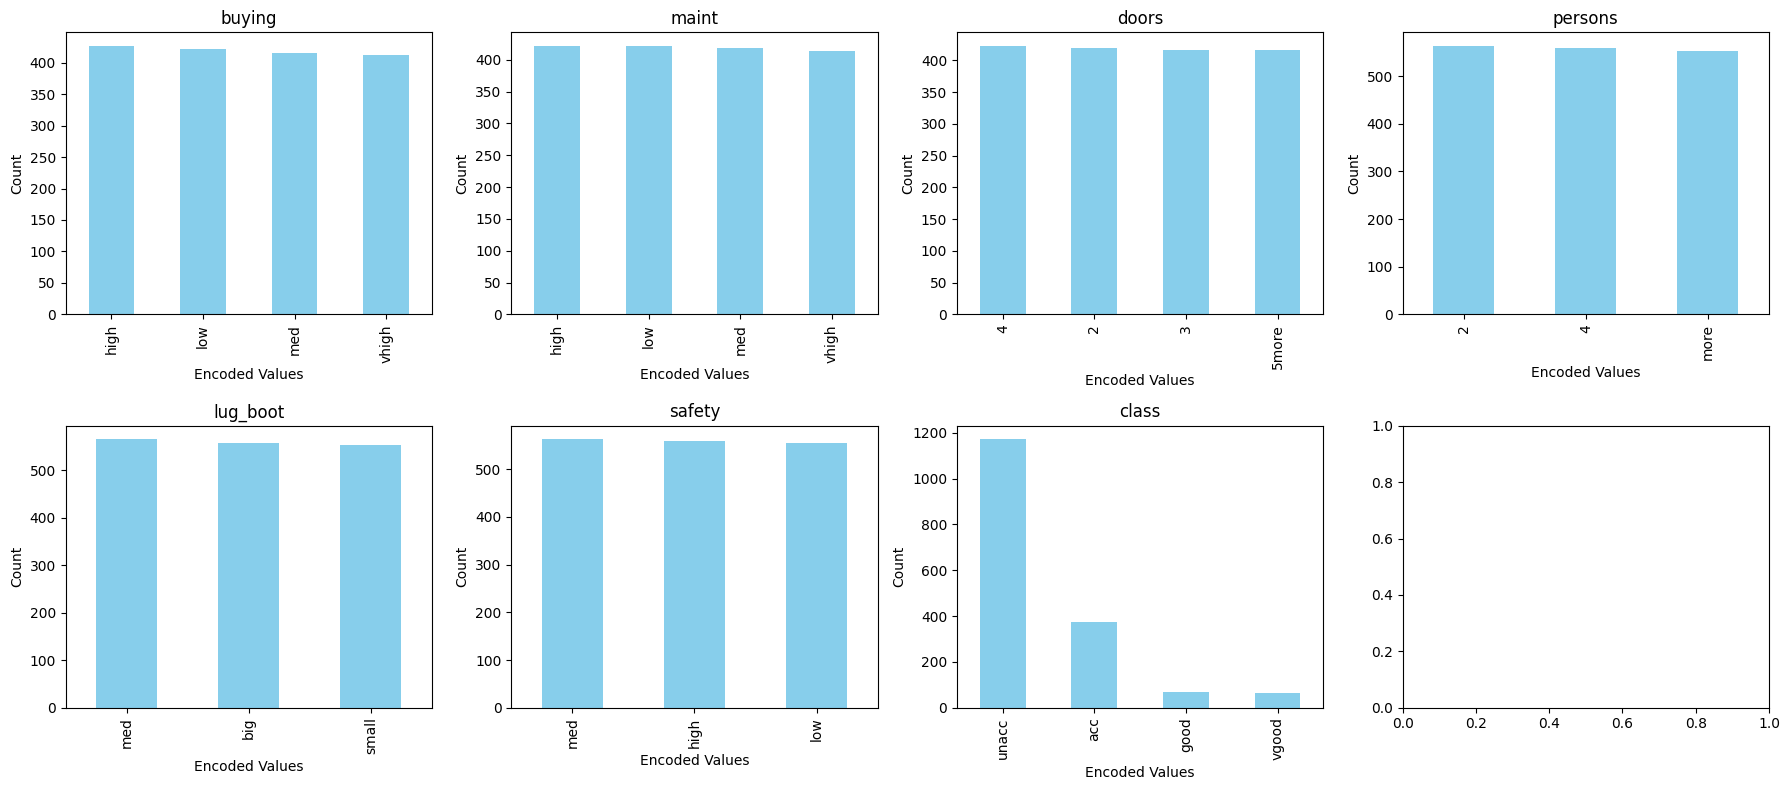

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
num_col = len(car_data.columns)

for i in range(num_col):
    car_data[car_data.columns[i]].value_counts().plot(kind='bar', color='skyblue', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{car_data.columns[i]}')
    axes[i//4, i%4].set_xlabel('Encoded Values')
    axes[i//4, i%4].set_ylabel('Count')

plt.tight_layout()
plt.show()



#Sub Category Representation of Label and Features

In [ ]:
car_data['class'].unique().tolist()

['unacc', 'acc', 'vgood', 'good']

In [ ]:
for i, feature in enumerate(features):
    print(features[i], car_data[feature].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['med' 'high' 'low']


#Encoding

In [ ]:
buying_maint_map = {"low": 0, "med": 1, "high": 2, "vhigh": 3}
lug_boot_map = {'small': 0, 'med': 1, 'big': 2}
safety_map = {"low": 0, "med": 1, "high": 2}

label_map = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

**Ordinal Encoding**  
Here the Buying and maintance feature consists of Ordinal values where the ranking matters. Whereas features like doors, persons and luggage boot consist  of values that are not consistently numerical so we can classify them as Catagorical Values. This is necessary so that each feature column gets the appropriate encoding technique.

In [ ]:
# Ordinal Encoding:
car_data['buying'] = car_data['buying'].map(buying_maint_map)
car_data['maint'] = car_data['maint'].map(buying_maint_map)
car_data['safety'] = car_data['safety'].map(safety_map)
car_data['lug_boot'] = car_data['lug_boot'].map(lug_boot_map)

car_data['class'] = car_data['class'].map(label_map)

**One Hot Encoding**  
Here, "doors" and "persons" are nominal which means they do not have any ranking. So, we perform one hot encoding on them.

In [ ]:
car_data = pd.get_dummies(car_data, columns=['doors', 'persons'])

# Changing position of "class" column to the last column
copy_data = car_data['class']
car_data.drop(columns=['class'], inplace=True)
car_data['class'] = copy_data

#Correlation

<Axes: >

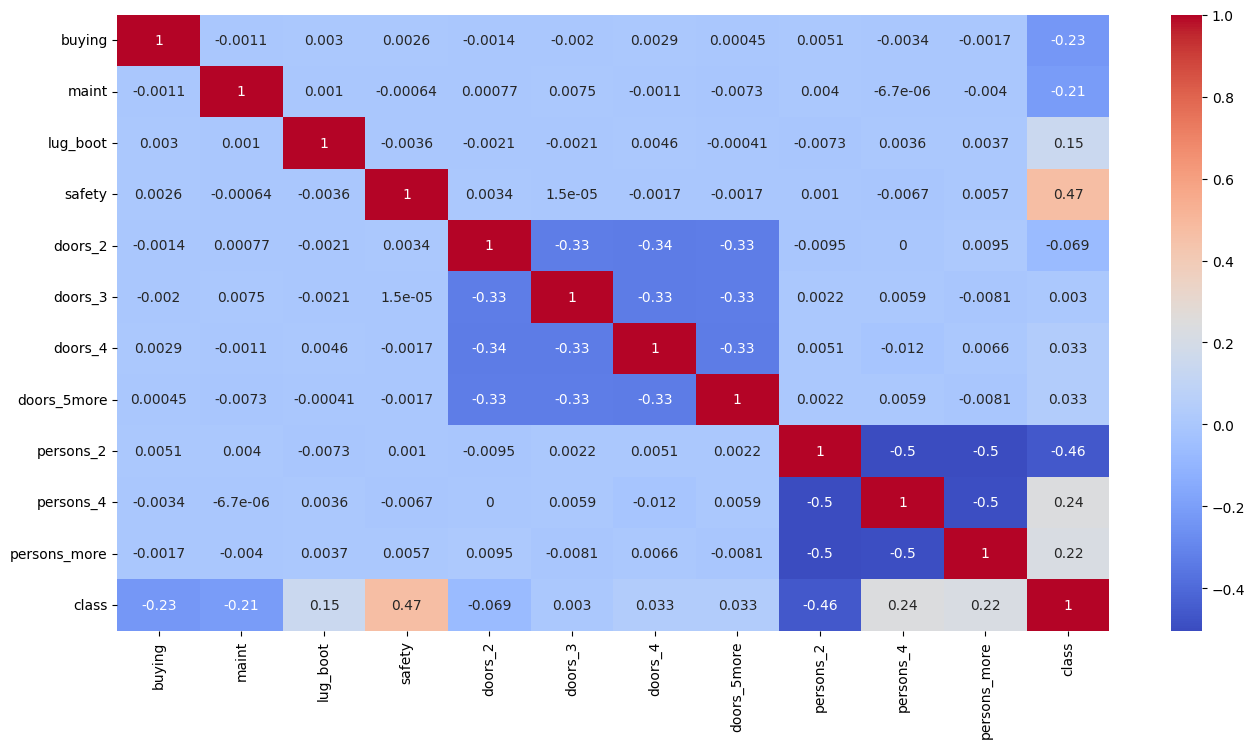

In [ ]:
fig=plt.figure(figsize=(16,8))
sns.heatmap(car_data.corr(method='spearman'),annot=True, cmap="coolwarm")

"doors_2", "doors_3", "doors_4", "doors_5more" have weak correlation with the target class. So, we drop those columns.

In [ ]:
weak_feat=['doors_2','doors_3','doors_4','doors_5more']
car_data = car_data.drop(weak_feat,axis=1)
updated_features = car_data.columns.tolist()
car_data.head()

,buying,maint,lug_boot,safety,persons_2,persons_4,persons_more,class
0,3,3,0,1,1,0,0,0
1,3,3,0,2,1,0,0,0
2,3,3,1,0,1,0,0,0
3,3,3,1,1,1,0,0,0
4,3,3,1,2,1,0,0,0


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

#random data splitting 70 - 30
X_train, X_test, y_train, y_test = train_test_split(car_data[updated_features].drop(['class'], axis=1), car_data['class'], train_size=0.70, random_state=0, stratify=car_data['class'])

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)

# Fit
log.fit(X_train, y_train)

# Prediction
pred_values = log.predict(X_test)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(log.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(log.score(X_test, y_test)))

The Training accuracy of the model is 0.88
The Testing accuracy of the model is 0.88


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
log_accuracy = accuracy_score(y_test, pred_values)
print(f'Accuracy of logistic Regression Model: {log_accuracy}')
print()
logistic_report=classification_report(y_test, pred_values)
print('Logistic Classification Report')
print(logistic_report)

Accuracy of logistic Regression Model: 0.8809523809523809

Logistic Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       352
           1       0.76      0.80      0.78       112
           2       0.45      0.50      0.48        20
           3       0.93      0.65      0.76        20

    accuracy                           0.88       504
   macro avg       0.77      0.72      0.74       504
weighted avg       0.89      0.88      0.88       504



In [ ]:
uni_vals = car_data['class'].unique()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(pred_values, y_test, labels = uni_vals)

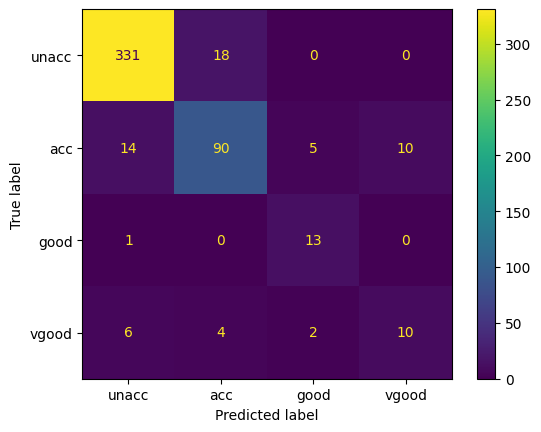

In [ ]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['unacc', 'acc', 'good', 'vgood'])
cm_disp.plot()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

pred_values = rfc.predict(X_test)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(X_test, y_test)))


The Training accuracy of the model is 0.96
The Testing accuracy of the model is 0.95


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

rfc_accuracy = accuracy_score(y_test, pred_values)
print(f'Accuracy of Random Forest: {rfc_accuracy}')
print()

rfc_report=classification_report(y_test, pred_values)
print('Random Forest Classification Report')
print(rfc_report)

Accuracy of Random Forest: 0.9523809523809523

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       352
           1       0.90      0.94      0.92       112
           2       0.77      0.85      0.81        20
           3       0.81      0.85      0.83        20

    accuracy                           0.95       504
   macro avg       0.87      0.90      0.88       504
weighted avg       0.95      0.95      0.95       504



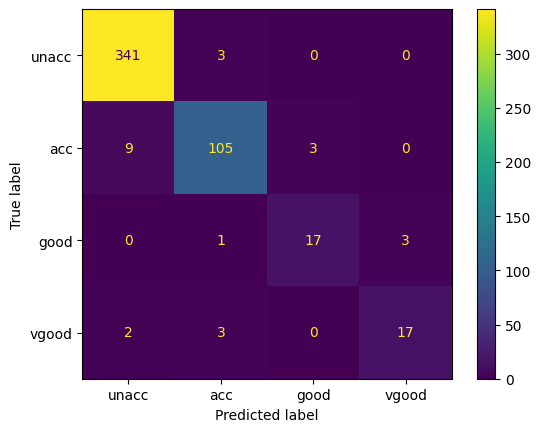

In [ ]:
uni_vals = car_data['class'].unique()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(pred_values, y_test, labels = uni_vals)

cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['unacc', 'acc', 'good', 'vgood'])
cm_disp.plot()

#SVM


In [ ]:
#linear kernel
from sklearn.svm import SVC
svm_lin = SVC(kernel='linear')
svm_lin.fit(X_train, y_train)
svm_lin_predictions=svm_lin.predict(X_test)

#Poly kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
svm_poly_predictions=svm_poly.predict(X_test)

#accuracy
accuracy_svm_lin=svm_lin.score(X_test, y_test)
accuracy_svm_poly=svm_poly.score(X_test, y_test)
print(f'SVM Linear accuracy: {accuracy_svm_lin}')
print(f'SVM Polynomial accuracy: {accuracy_svm_poly}')



SVM Linear accuracy: 0.9027777777777778
SVM Polynomial accuracy: 0.9265873015873016


Since SVM with poly kernal gives us better accuracy we have chosen to use this kernal.


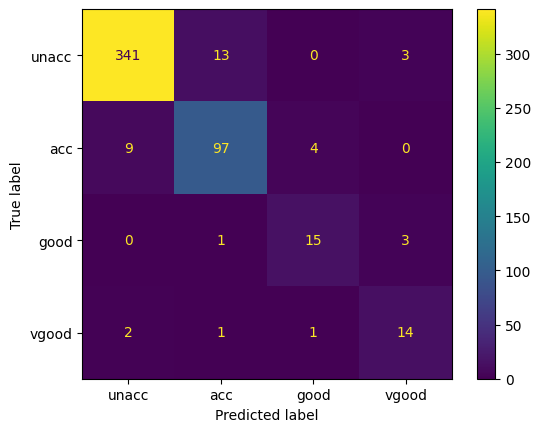

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
uq_class=car_data['class'].unique()
svm_cm = confusion_matrix( svm_poly_predictions,y_test, labels =uq_class)
svm_cm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels = ['unacc', 'acc', 'good', 'vgood'])
svm_cm_disp.plot()



In [ ]:
#Classification Report
from sklearn.metrics import classification_report
svm_poly_report=classification_report(y_test,svm_poly_predictions)
print('SVM Classification Report: ')
print(svm_poly_report)

SVM Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       352
           1       0.88      0.87      0.87       112
           2       0.78      0.70      0.74        20
           3       0.79      0.75      0.77        20

    accuracy                           0.93       504
   macro avg       0.85      0.82      0.84       504
weighted avg       0.93      0.93      0.93       504



#Comparison

Text(0, 0.5, 'Accuracy (%)')

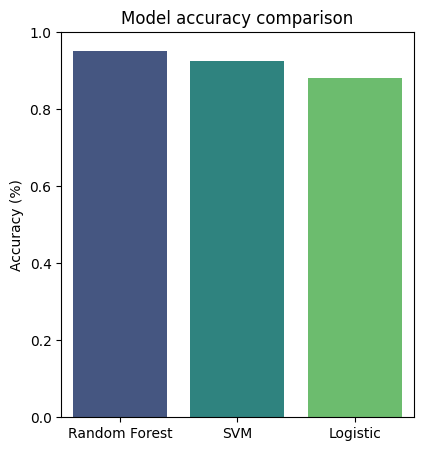

In [ ]:

x_axis=['Random Forest','SVM','Logistic']
model_accuracy_values=[rfc_accuracy,accuracy_svm_poly,log_accuracy]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x=x_axis,y=model_accuracy_values,palette='viridis')
plt.title('Model accuracy comparison')
plt.ylabel('Accuracy (%)')